In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [59]:
archetype_num = 23
genes_num = 16460

In [ ]:
f = open("../gene_exp_k=30.txt")
data = f.readlines()
f.close()

In [ ]:
clean_data = np.zeros((archetype_num, genes_num))
for i in range(1, genes_num+1):
    tmp = data[i].replace('\n','').split(" ")
    for j in range(1, archetype_num+1):
        clean_data[j-1][i-1] = float(tmp[j])

In [ ]:
df = pd.DataFrame(clean_data.T) 

In [ ]:
corrM = df.corr() 
 
corrM 

In [ ]:
sns.set(rc={'figure.figsize':(10, 10)})
pic = sns.heatmap(corrM, xticklabels=corrM.columns, yticklabels=corrM.columns)
pic.get_figure() .savefig("Correlation.png")

# Top 300 genes

In [66]:
f = open("../gene_dif_k=80.txt")
top_gene_data = f.readlines()
f.close()

In [67]:
top_gene_num = 300

In [68]:
clean_top_gene_data = np.zeros((archetype_num, genes_num))
for i in range(1, genes_num+1):
    tmp = top_gene_data[i].replace('\n','').split(" ")
    for j in range(1, archetype_num+1):
        clean_top_gene_data[j-1][i-1] = float(tmp[j])

In [69]:
top_gene_idx = []
for i in range(archetype_num):
    tmp = np.sort(clean_top_gene_data[i])
    tmp = tmp[::-1]
    threshold = tmp[top_gene_num]
    each_row = []
    for j in range(genes_num):      
        if clean_top_gene_data[i][j] > threshold:
            each_row.append(j)
    top_gene_idx.append(each_row)

In [70]:
top_gene_idx = np.array(top_gene_idx)
top_gene_idx.shape

(23, 300)

In [71]:
top_gene_matrix = np.zeros((archetype_num, archetype_num ))

In [72]:
for i in range(archetype_num):
    for j in range(archetype_num):
        top_gene_matrix[i][j] = len(list(set(top_gene_idx[i]).intersection(top_gene_idx[j])))
        

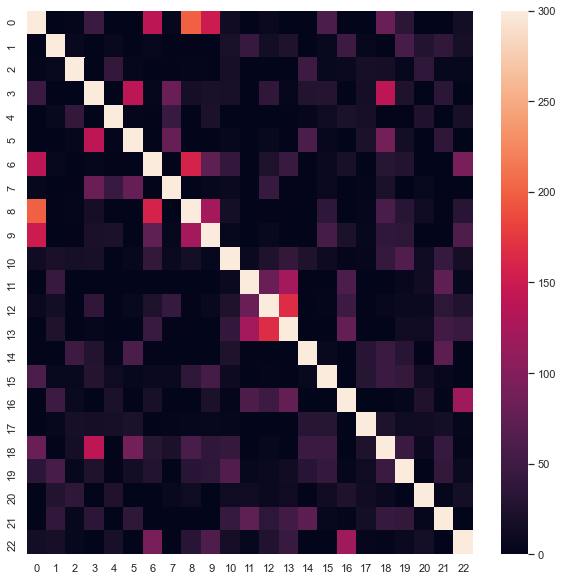

In [73]:
sns.set(rc={'figure.figsize':(10, 10)})
pic = sns.heatmap(top_gene_matrix)
pic.get_figure() .savefig("Top_gene_k=80.png")